In [2]:
# Import the dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import data
data=pd.read_csv('employee-compensation.csv')
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


## DATA INFO

## EDA

In [3]:
data.shape

(683277, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

In [5]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [6]:
data.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,682926.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,2.977943,2016.364632,492.532173,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,1.579574,2.092180,330.911187,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,2.000000,2017.000000,535.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,4.000000,2018.000000,790.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [7]:
#Unique Values in the data frame

def fraction_unique(x):
    return len(data[x].unique())

number_unique_vals={x:fraction_unique(x) for x in data.columns}

number_unique_vals

#'click_time' has the highest volume of unique values

{'Organization Group Code': 7,
 'Job Family Code': 59,
 'Job Code': 1210,
 'Year Type': 2,
 'Year': 8,
 'Organization Group': 7,
 'Department Code': 61,
 'Department': 110,
 'Union Code': 71,
 'Union': 130,
 'Job Family': 59,
 'Job': 1350,
 'Employee Identifier': 309750,
 'Salaries': 498512,
 'Overtime': 262033,
 'Other Salaries': 307854,
 'Total Salary': 615223,
 'Retirement': 451716,
 'Health and Dental': 209969,
 'Other Benefits': 496200,
 'Total Benefits': 616499,
 'Total Compensation': 658692}

In [8]:
#Column Types
data.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [4]:
#dropping rows having missing values
data = data.dropna()
data.shape

#a total of 358 rows were dropped

(682919, 22)

In [5]:
#filter out objects
data1=data.copy()
data1 = data1.select_dtypes(include = ['float64', 'int64'])
data1.head()
#trying to see what would make sense to use in a scatter plot

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,2013,21.0,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,2013,21.0,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,2013,21.0,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,2013,21.0,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,2013,21.0,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


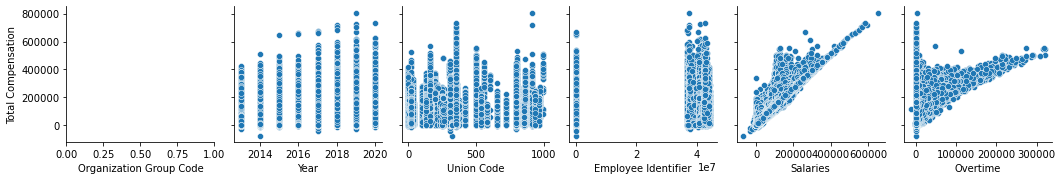

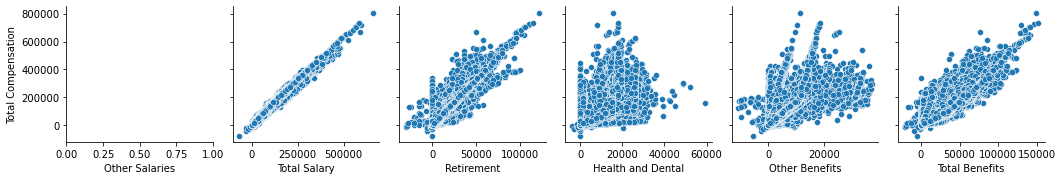

In [11]:
for s in range(0, 11, 6):
    sns.pairplot(data=data1,
                x_vars=data1.columns[s:s+6],
                y_vars=['Total Compensation'])

In [12]:
# 'Organization Group Code' could be a good independent variable
data1['Organization Group Code'].value_counts()
#I'm planning on using 'Total Compensation' as the dependent variable and it doesn't
#seem like I can use many of the other columns because they are dependent of each other.
#that leaves a few options left such as 'Year', 'Union Code', 
#'Employer Identifier' (this one is useless because it changes all the time), and
#'Organization Group Code'

2    215688
4    150106
1    130982
6     62123
5     61860
3     61678
7       482
Name: Organization Group Code, dtype: int64

In [15]:
# 'Year' could be a good independent variable
data1['Year'].value_counts()

2017    129815
2019     89053
2016     88299
2015     86067
2018     85638
2014     82291
2013     79380
2020     42376
Name: Year, dtype: int64

In [13]:
#to address ccolor on the scatter plot, it seems best to use one that has two options
# 'Year Type' provides two options: Fiscal/Calendar
data['Year Type'].value_counts()

Fiscal      384892
Calendar    298027
Name: Year Type, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

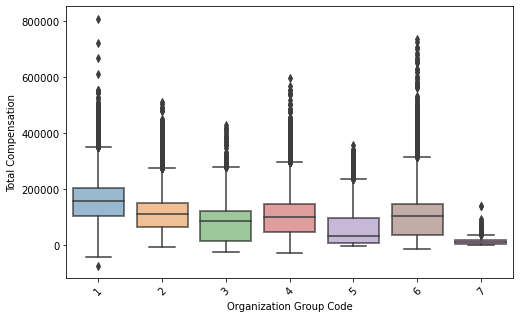

In [14]:
#use box and whiskers to catch trends and outliers for 'Organization Group Code'
plt.figure(figsize = (8, 5))
ax = sns.boxplot(x='Organization Group Code', y='Total Compensation', data=data1)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

#many outliers, therefore we cannot rid of outliers
#Also, certain organizations have higher salaries from others

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2013'),
  Text(1, 0, '2014'),
  Text(2, 0, '2015'),
  Text(3, 0, '2016'),
  Text(4, 0, '2017'),
  Text(5, 0, '2018'),
  Text(6, 0, '2019'),
  Text(7, 0, '2020')])

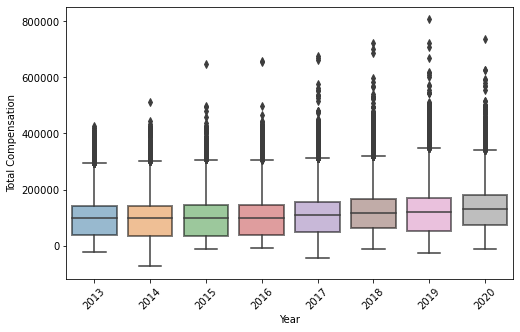

In [16]:
#use box and whiskers to catch trends and outliers for 'Year'
plt.figure(figsize = (8, 5))
ax = sns.boxplot(x='Year', y='Total Compensation', data=data1)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

#many outliears but it seems to be consistent over the years, 
#maybe the same people are the ones with the high salaries and their
#salaries increase over time.
#No outliers will be removed because it will not be a good representation of the data.

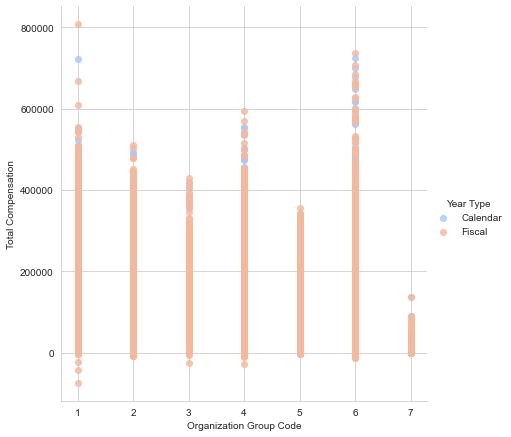

In [20]:
#will do a scatter plot and compare 'Organization Group Code' with 'Unio Code'
sns.set_style('whitegrid')
sns.lmplot('Organization Group Code','Total Compensation',data=data, hue='Year Type',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)
#not as scatter as I would hope for

In [21]:
# 'Year' could be a good independent variable
data['Organization Group'].value_counts()

Public Works, Transportation & Commerce     215688
Community Health                            150106
Public Protection                           130982
General Administration & Finance             62123
Culture & Recreation                         61860
Human Welfare & Neighborhood Development     61678
General City Responsibilities                  482
Name: Organization Group, dtype: int64

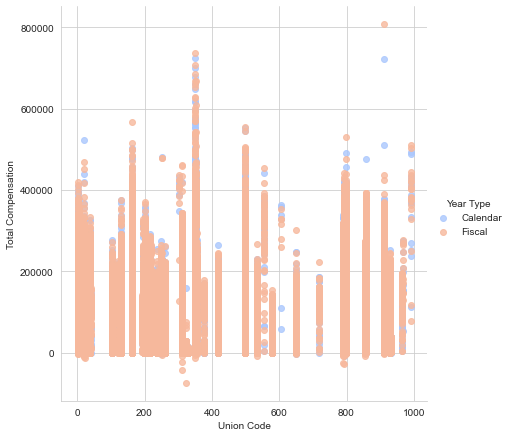

In [22]:
#scatter plot of 'Union Code'
sns.set_style('whitegrid')
sns.lmplot('Union Code','Total Compensation',data=data, hue='Year Type',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)
#A bit more scatter and probably the better choice
#will end up using Union code for k-means

## K-Means

In [31]:
#Label columns to rid unwated columns from copy paste

data1.columns

Index(['Organization Group Code', 'Year', 'Union Code', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [33]:
#rid unwanted columns

data2=data1.drop(['Organization Group Code', 'Year', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits'], axis=1)
data2.head()

,Union Code,Total Compensation
0,21.0,85281.78
1,21.0,79895.32
2,21.0,93649.71
3,21.0,134237.37
4,21.0,7512.31


In [38]:
from sklearn.cluster import KMeans

# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data2)

#n-cluster center points
print(kmeans.cluster_centers_)

[[   452.06053529 115971.41202767]
 [   545.53166765  23693.39384644]
 [   502.73797619 208176.65507027]]


In [39]:
#kmeans label array

y=kmeans.labels_
print(y)

[0 0 0 ... 0 2 2]


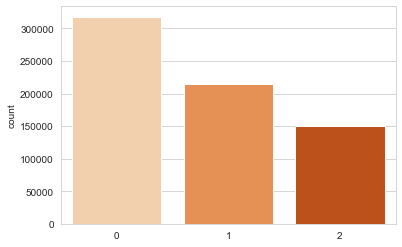

In [40]:
#Label counts for n_clusters=3 for 'Total Compensation' vs 'Union Code'

sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

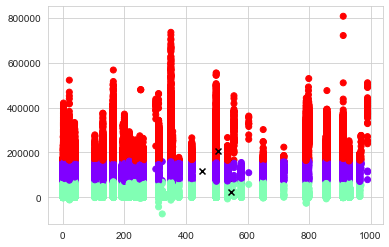

In [45]:
#K-means for n_clusters=3 for 'Total Compensation' vs 'Union Code'

plt.scatter(data2.iloc[:,0].values,data2.iloc[:,1].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()

#results show a huge gap in total wages
#will use a different comparison to see label counts

In [42]:
#getting rid of data not used in new k-means fit

data3=data1.drop(['Organization Group Code', 'Year', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Union Code'], axis=1)
data3.head()

#'Total Benefits' will be used, although if we mentioned that there could be a high 
#probability of dependence using the compensation columns, I believe 'Total Benefits'
#are the least coupled column of the bunch; therefore, it would serve as a great back up

,Total Benefits,Total Compensation
0,27747.13,85281.78
1,22216.82,79895.32
2,30116.78,93649.71
3,40021.45,134237.37
4,2428.31,7512.31


In [43]:
# k-means with some arbitrary k
kmeans1 = KMeans(n_clusters=3, max_iter=50)
kmeans1.fit(data3)

#n-cluster center points
print(kmeans1.cluster_centers_)

#note that these numbers are very similar to previous numbers 
#even though a different independent column was used.

[[  6370.80477875  23654.55006271]
 [ 49360.25818015 206854.38628093]
 [ 33668.91016669 115306.45002204]]


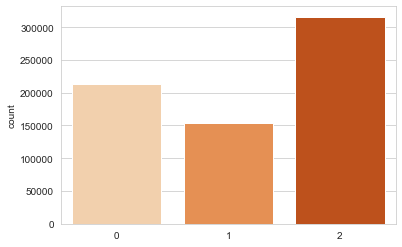

In [47]:
#Label counts for n_clusters=3 for 'Total Compensation' vs 'Total Benefits'

sns.countplot(x=kmeans1.labels_, palette='Oranges')
plt.show()

#seems very similar to the previous count just different label clusters

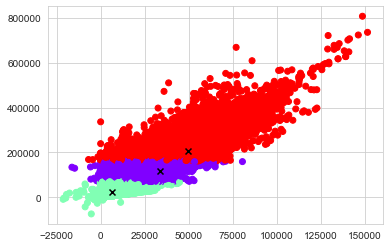

In [46]:
#K-means for n_clusters=3 for 'Total Compensation' vs 'Total Benefits'

plt.scatter(data3.iloc[:,0].values,data3.iloc[:,1].values, c=kmeans1.labels_, cmap="rainbow")
centers = np.array(kmeans1.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()

#Although the scatter plot looks very different, the results are similar when using either of the 
#independent variable column. 

## Determining The Optimal Number Of Clusters

In [48]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [49]:
K = range(1,10)
X = data2
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

In [52]:
# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

#numbers are too big, probably will have to scale down before using this method
#will try another method

ValueError: Maximum allowed dimension exceeded

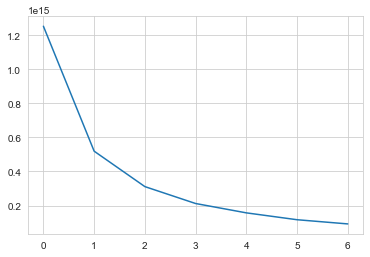

In [51]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data2)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [56]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [55]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

MemoryError: Unable to allocate 1021. MiB for an array with shape (196, 682919) and data type float64

In [57]:
#will try to get silhoutte score
silhouette_score(X,y)

MemoryError: Unable to allocate 1021. MiB for an array with shape (196, 682919) and data type float64

## Try answering the below questions to stay on the right track for solving the assignment.

In [9]:
#Total Benefits vs Union Code
data4=data1.drop(['Organization Group Code', 'Year', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Compensation'], axis=1)
data4.head()

,Union Code,Total Benefits
0,21.0,27747.13
1,21.0,22216.82
2,21.0,30116.78
3,21.0,40021.45
4,21.0,2428.31


In [10]:
from sklearn.cluster import KMeans

# k-means with some arbitrary k
kmeans2 = KMeans(n_clusters=3, max_iter=50)
kmeans2.fit(data4)

#n-cluster center points
print(kmeans2.cluster_centers_)

#These numbers will not reflect previous numbers because we are using a different 
#dependent variable when it comes cordinate placemen.

[[  399.87659296 50424.72482353]
 [  552.31042871  5845.30450581]
 [  497.65806456 33348.68814125]]


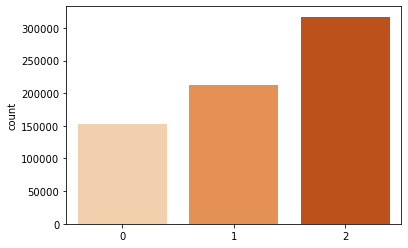

In [11]:
#Label counts for n_clusters=3 for 'Union Code' vs 'Total Benefits'

sns.countplot(x=kmeans2.labels_, palette='Oranges')
plt.show()

#Although we are using completely different dependent variable, the benefits are 
#very similar to those of the total compensation, meaning that both 'Total Compensation'
#'Total Benefits' are proportional to each other; hence, why I didnt want to use them
#to compare each other.

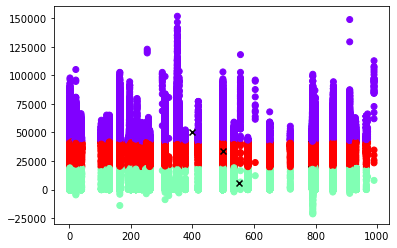

In [12]:
#K-means for n_clusters=3 for 'Union Code' vs 'Total Benefits'

plt.scatter(data4.iloc[:,0].values,data4.iloc[:,1].values, c=kmeans2.labels_, cmap="rainbow")
centers = np.array(kmeans2.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()

#Although the group counts are similar across the board, the total benefits don't as spread out as the
#total compesantion. Benefits seem to have a cap while salaries seem as if they have bigger outliers.

Doing Different comparisons, we realize that benefits are proportional to ones total compensation.
It seems people compensated at 100k get around 25k in benefits, people making around 200k get around 45k in 
benefits, while people making around 500k get about 100k in benefits. Although the ratios slightly reduce
with higher wages, it isn't by much. 

I wasn't able to make the comparison for K-Means and Hierarchical clustering, the data would run for Hierarchical clustering.